<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage5.h5', 'test_df',mode='r')

In [3]:
df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followees_s',
       'num_followees_d', 'inter_followers', 'inter_followees', 'adar_index',
       'follows_back', 'same_comp', 'shortest_path', 'weight_in', 'weight_out',
       'weight_f1', 'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s',
       'page_rank_d', 'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followers', 'preferential_followees', 'svd_u_s_d',
       'svd_v_s_d'],
      dtype='object')

In [4]:
df_final_train.shape

(100002, 58)

In [5]:
df_final_test.shape

(50002, 58)

In [6]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [7]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9226747213831893 test Score 0.8976290810028519
Estimators =  50 Train Score 0.9205656061551258 test Score 0.9000105853710172
Estimators =  100 Train Score 0.9203837632206011 test Score 0.9153963894072505
Estimators =  250 Train Score 0.9205678358841313 test Score 0.9126609984005387
Estimators =  450 Train Score 0.9212907274724126 test Score 0.9134706414490986


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

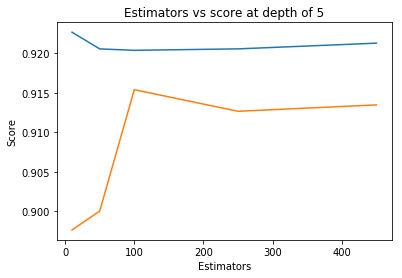

In [8]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.9112869034693138 test Score 0.8930326319768175
depth =  9 Train Score 0.9547740748313228 test Score 0.9228531067490355
depth =  11 Train Score 0.9608566305322357 test Score 0.9254845717419274
depth =  15 Train Score 0.9634606197973309 test Score 0.9237302459224203
depth =  20 Train Score 0.9631782748772779 test Score 0.9260180423235815
depth =  35 Train Score 0.9632782422315452 test Score 0.9263113545397094
depth =  50 Train Score 0.9632782422315452 test Score 0.9263113545397094
depth =  70 Train Score 0.9632782422315452 test Score 0.9263113545397094
depth =  130 Train Score 0.9632782422315452 test Score 0.9263113545397094


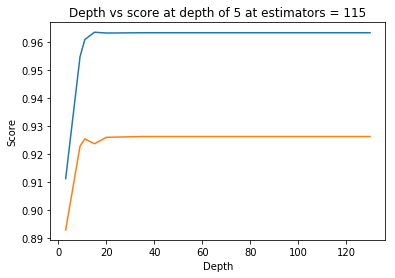

In [9]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [10]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96184197 0.96192274 0.96056841 0.96174987 0.96282695]
mean train scores [0.96281202 0.96275485 0.96102106 0.96268281 0.96406839]


In [11]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [12]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [13]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [14]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9641146622466723
Test f1 score 0.9264938516378056


In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


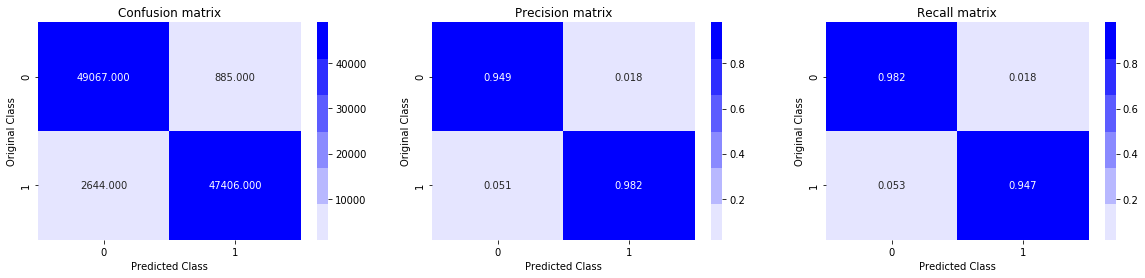

Test confusion_matrix


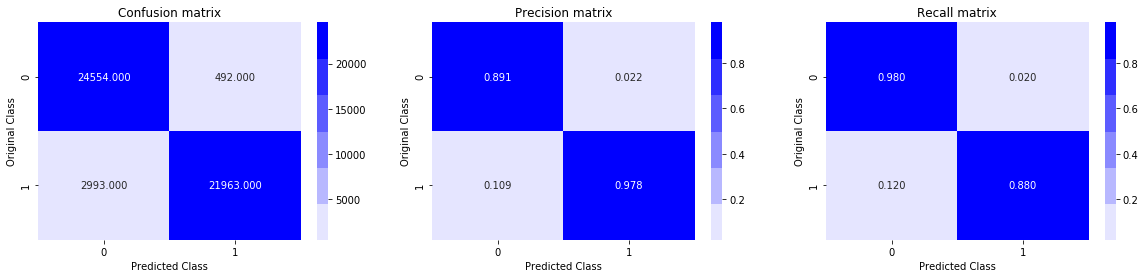

In [16]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

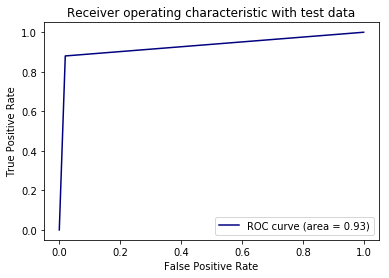

In [17]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

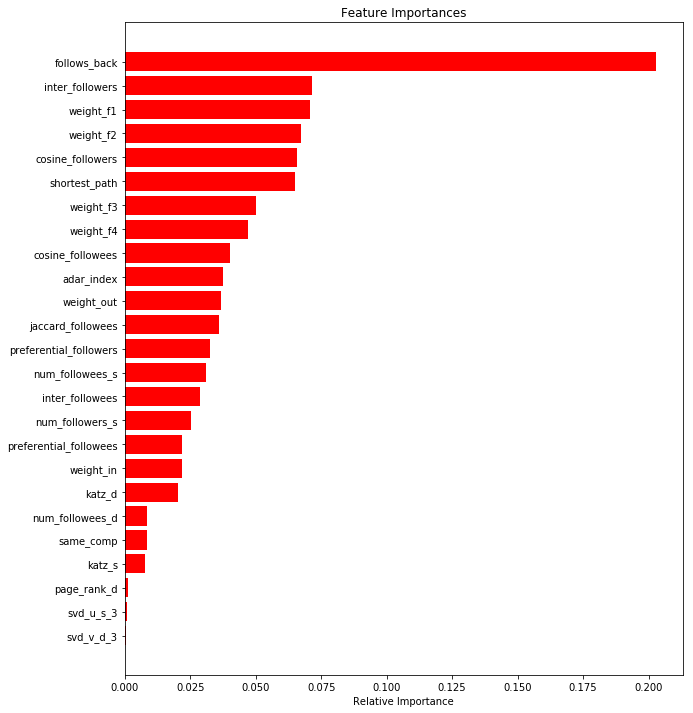

In [18]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_depth' : [3,4,5,6,8,10,12,15],
    'min_child_weight' : [1,3,5,7]
}
estimator1 = xgb.XGBClassifier(objective = 'binary:logistic',
eval_metric = 'error',scale_pos_weight = 1,random_state = 12)
Research1 = RandomizedSearchCV(estimator1,param_distributions = params,cv=4,n_jobs=4, scoring = 'f1',verbose = 22, random_state = 12)
Research1.fit(df_final_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   42.5s
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   42.9s
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   43.2s
C:\Users\Tarun Makkar\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A wo

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='error',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=12,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=4,
          param_distributions={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=12, refit=True,
          return_train_score='warn', scoring='f1', verbose=22)

In [20]:
print('min_child_weight',Research1.best_params_['min_child_weight'])
print('max_depth',Research1.best_params_['max_depth'])
print('best f1_score',Research1.best_score_)

min_child_weight 1
max_depth 12
best f1_score 0.9798530515653893


In [21]:
w=Research1.best_params_["min_child_weight"]
d=Research1.best_params_['max_depth']

In [22]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params={

 "colsample_bytree"        : [0.3, 0.4, 0.5 , 0.7 ,0.9],
 'subsample'               :[0.75,0.80,0.85,0.90],
 
  }
estimator2 =xgb.XGBClassifier(objective= 'binary:logistic',
eval_metric= 'error',scale_pos_weight = 1,random_state=21,min_child_weight = w,max_depth = d)
Rsearch2= RandomizedSearchCV(estimator2,param_distributions=params,scoring='f1',n_jobs=4,iid=False, cv=4,verbose=21,random_state=21)
Rsearch2.fit(df_final_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:   47.8s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:   47.9s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:   48.2s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:   48.9s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:  4.1min
[Parallel(

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='error',
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=12,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=21,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid=False, n_iter=10, n_jobs=4,
          param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 0.9], 'subsample': [0.75, 0.8, 0.85, 0.9]},
          pre_dispatch='2*n_jobs', random_state=21, refit=True,
          return_train_score='warn', scoring='f1', verbose=21)

In [23]:
print('colsample_bytree',Rsearch2.best_params_['colsample_bytree'])
print('subsample',Rsearch2.best_params_['subsample'])
print('best f1_score',Rsearch2.best_score_)

colsample_bytree 0.7
subsample 0.8
best f1_score 0.9803207033186153


In [24]:
c=Rsearch2.best_params_["colsample_bytree"]
s=Rsearch2.best_params_['subsample']

### Training with best hyperparameters

In [25]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'error'
params['eta']= 0.02

params['max_depth'] = d
params['min_child_weight'] = w
params['colsample_bytree'] = c
params['subsample'] = s

d_train = xgb.DMatrix(df_final_train,y_train)
d_test = xgb.DMatrix(df_final_test,y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(df_final_train,y_train)
predict_y = bst.predict(d_test)

[0]	train-error:0.027099	valid-error:0.067977
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 20 rounds.
[10]	train-error:0.01899	valid-error:0.064097
[20]	train-error:0.01915	valid-error:0.064237
Stopping. Best iteration:
[4]	train-error:0.02019	valid-error:0.062897



### OBSERVATION
* f1_score is 0.98 and train-error is 0.02 and test-error is 0.06 .
      * Best hyperparameters
              *min_child_weight 1
              *max_depth 12
              *colsample_bytree 0.7
              *subsample 0.8